# ML Answers

- **Answer Set**: No. 02
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import xgboost as skxgb
import sklearn.svm as sksvm
import sklearn.tree as sktree
import sklearn.ensemble as skensemble
import sklearn.decomposition as skpca

import torch as torch
import skorch as skorch

import sklearn.base as skbase
import sklearn.utils as skutils
import sklearn.metrics as skmetrics
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing
import sklearn.model_selection as skselection

sk.set_config(display="diagram")

### Dataset

Now we can load our dataset:

In [3]:
data_frame = pd.read_csv("../lib/pd_speech_features.csv", skiprows=1)
data_frame = skutils.shuffle(data_frame)

data_label = data_frame["class"]
data_frame = data_frame.drop(["id", "class"], axis=1)

data_features = data_frame.to_numpy()
data_labels = data_label.to_numpy()

data_labels = np.array(data_labels, dtype=np.int32)

train_features, test_features, train_labels, test_labels = skselection.train_test_split(
    data_features, 
    data_labels, 
    test_size=0.3, 
    random_state=313
)

train_features = np.array(train_features, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.int64)
test_features = np.array(test_features, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.int64)

data_frame

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
716,0,0.83955,0.69576,0.27656,396,395,0.004876,0.000028,0.00072,0.000004,...,1.5258,1.6052,28.9067,4.6902,3.0958,3.2225,2.9193,10.4316,23.8774,82.3911
82,0,0.84157,0.72248,0.36795,441,440,0.004372,0.000038,0.00061,0.000003,...,8.7070,3.7369,2.5475,2.3873,3.0899,3.4803,3.6094,14.4831,21.7905,61.5014
246,0,0.79141,0.82329,0.54703,377,376,0.005120,0.000046,0.00198,0.000010,...,4.5526,2.5600,2.5492,3.6574,3.1099,2.6128,3.1704,7.5835,9.1002,62.0868
726,1,0.77084,0.74685,0.59217,199,198,0.006180,0.000270,0.00181,0.000011,...,2.5171,50.7460,32.3299,11.2564,4.5460,5.6458,8.5135,6.8657,6.7560,5.3985
631,1,0.83149,0.70406,0.47776,211,210,0.009126,0.000072,0.00145,0.000013,...,1.9072,2.1867,20.5324,5.8042,3.0551,3.3219,3.7125,4.1013,4.6983,23.1329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0,0.80438,0.75680,0.30563,441,440,0.004376,0.000024,0.00072,0.000003,...,1.9654,2.1826,16.2737,4.4227,2.8865,2.3521,2.6424,23.4592,29.7303,64.1884
527,0,0.84824,0.55586,0.38894,503,502,0.003839,0.000035,0.00064,0.000002,...,2.6297,2.5545,4.0977,13.6620,27.0223,43.9576,50.2374,48.1765,45.1292,87.9815
406,0,0.86214,0.62775,0.40481,430,429,0.004482,0.000039,0.00073,0.000003,...,128.5368,58.3265,38.1570,34.3013,24.1730,11.0682,7.2948,7.7504,5.8121,3.2061
423,1,0.70897,0.75667,0.81928,191,183,0.007597,0.000553,0.02010,0.000153,...,2.3918,2.3724,2.2054,2.0080,2.7799,2.5287,2.8741,3.1855,2.8069,2.7752


---

## Problem

In this problem, we are going to fit seven types of models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

### Decision Tree

In [22]:
decision_tree_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

decision_tree_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### Random Forest

In [5]:
random_forest_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

random_forest_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### XGBoost

In [6]:
skxgb.set_config(verbosity=0)

xgboost_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skxgb.XGBClassifier(use_label_encoder=False))
    ]),
    param_grid={},
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

xgboost_predicts = xgboost_model.predict(test_features)

xgboost_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

### SVM

In [7]:
svm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", sksvm.SVC())
    ]),
    param_grid={
        "classifier__C": [0.5, 1, 10, 100],
        "classifier__kernel": ["linear", "poly", "rbf", "sigmoid"],
        "classifier__gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

svm_predicts = svm_model.predict(test_features)

svm_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.5, 1, 10, 100],
                         'classifier__gamma': ['scale', 1, 0.1, 0.01, 0.001,
                                               0.0001],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             scoring='accuracy')

### MLP

In [45]:
class MLP(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        torch_layers = []
        input_layers = 753

        for layer in layers:
            torch_layers.append(torch.nn.Linear(input_layers, layer))
            torch_layers.append(torch.nn.ReLU())
            input_layers = layer
        
        torch_layers.append(torch.nn.Linear(input_layers, 2))
        torch_layers.append(torch.nn.Softmax(dim=-1))

        self.layers = torch.nn.Sequential(*torch_layers)
    
    def forward(self, X):
        return self.layers(X)

mlp_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skorch.NeuralNetClassifier(MLP, verbose=False))
    ]),
    param_grid={
        "classifier__module__layers": [(10,), (20,), (50,), (100, 10)],
        "classifier__lr": [0.1, 0.01],
        "classifier__max_epochs": [50],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

mlp_predicts = mlp_model.predict(test_features)

mlp_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        <class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
))]),
             n_jobs=-1,
             param_grid={'classifier__lr': [0.1, 0.01],
                         'classifier__max_epochs': [50],
                         'classifier__module__layers': [(10,), (20,), (50,),
                                                        (100, 10)]},
             scoring='accuracy')

### ELM

In [41]:
class ELMClassifier(skbase.BaseEstimator, skbase.ClassifierMixin):
    def __init__(self, hidden_size=200, activation="sigmoid"):
        self.hidden_size = hidden_size
        self.activation = activation

        self._input_size = 753
        self._hidden_size = self.hidden_size
        self._output_size = 2

        self._activation = {
            "sigmoid": lambda x: 1. / (1. + np.exp(-x)),
            "relu": lambda x: np.where(x < 0, np.zeros(x.shape), x)
        }[self.activation]

        self._beta = np.random.uniform(-1., 1., size=(self._hidden_size, self._output_size))
        self._w = np.random.uniform(-1, 1, size=(self._input_size, self._hidden_size))
        self._bias = np.zeros(shape=(self._hidden_size,))

    def fit(self, X, y):
        H = self._activation(X @ self._w + self._bias)
        H_pinv = np.linalg.pinv(H)
        self._beta = H_pinv @ np.eye(np.max(y) + 1)[y]

    def predict(self, X):
        H = self._activation(X @ self._w + self._bias)
        return np.argmax(H @ self._beta, axis=-1)

    def predict_proba(self, X):
        pass

elm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", ELMClassifier())
    ]),
    param_grid={
        "classifier__hidden_size": [200, 500, 1000, 5000, 10000, 50000],
        "classifier__activation": ["sigmoid", "relu"],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

elm_predicts = elm_model.predict(test_features)

elm_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier', ELMClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__activation': ['sigmoid', 'relu'],
                         'classifier__hidden_size': [200, 500, 1000, 5000,
                                                     10000, 50000]},
             scoring='accuracy')

### AutoEncoder

In [43]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        encoder_layers = []
        decoder_layers = []
        input_layers = 753

        for layer in layers:
            encoder_layers.insert(-1, torch.nn.Linear(input_layers, layer))
            encoder_layers.insert(-1, torch.nn.ReLU())
            decoder_layers.insert(0, torch.nn.ReLU())
            decoder_layers.insert(0, torch.nn.Linear(layer, input_layers))
            input_layers = layer

        self.encoder = torch.nn.Sequential(*encoder_layers)
        self.decoder = torch.nn.Sequential(*decoder_layers)
    
    def forward(self, X):
        return self.decoder(self.encoder(X))

class NeuralNetTransformer(skorch.NeuralNet, skbase.TransformerMixin):
    def get_loss(self, y_pred, y_true, X, **kwargs):
        with torch.no_grad():
            return -torch.nn.functional.mse_loss(y_true, y_pred)
    
    def transform(self, X):
        return self.forward(X)

auto_encoder_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("autoencoder", NeuralNetTransformer(AutoEncoder, criterion=torch.nn.NLLLoss, verbose=True)),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "autoencoder__module__layers": [(10,), (20,), (50,), (100, 10)],
        "autoencoder__lr": [0.1, 0.01],
        "autoencoder__max_epochs": [50],
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

auto_encoder_predicts = auto_encoder_model.predict(test_features)

auto_encoder_model

c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\s

RuntimeError: The size of tensor a (128) must match the size of tensor b (753) at non-singleton dimension 1

### Results

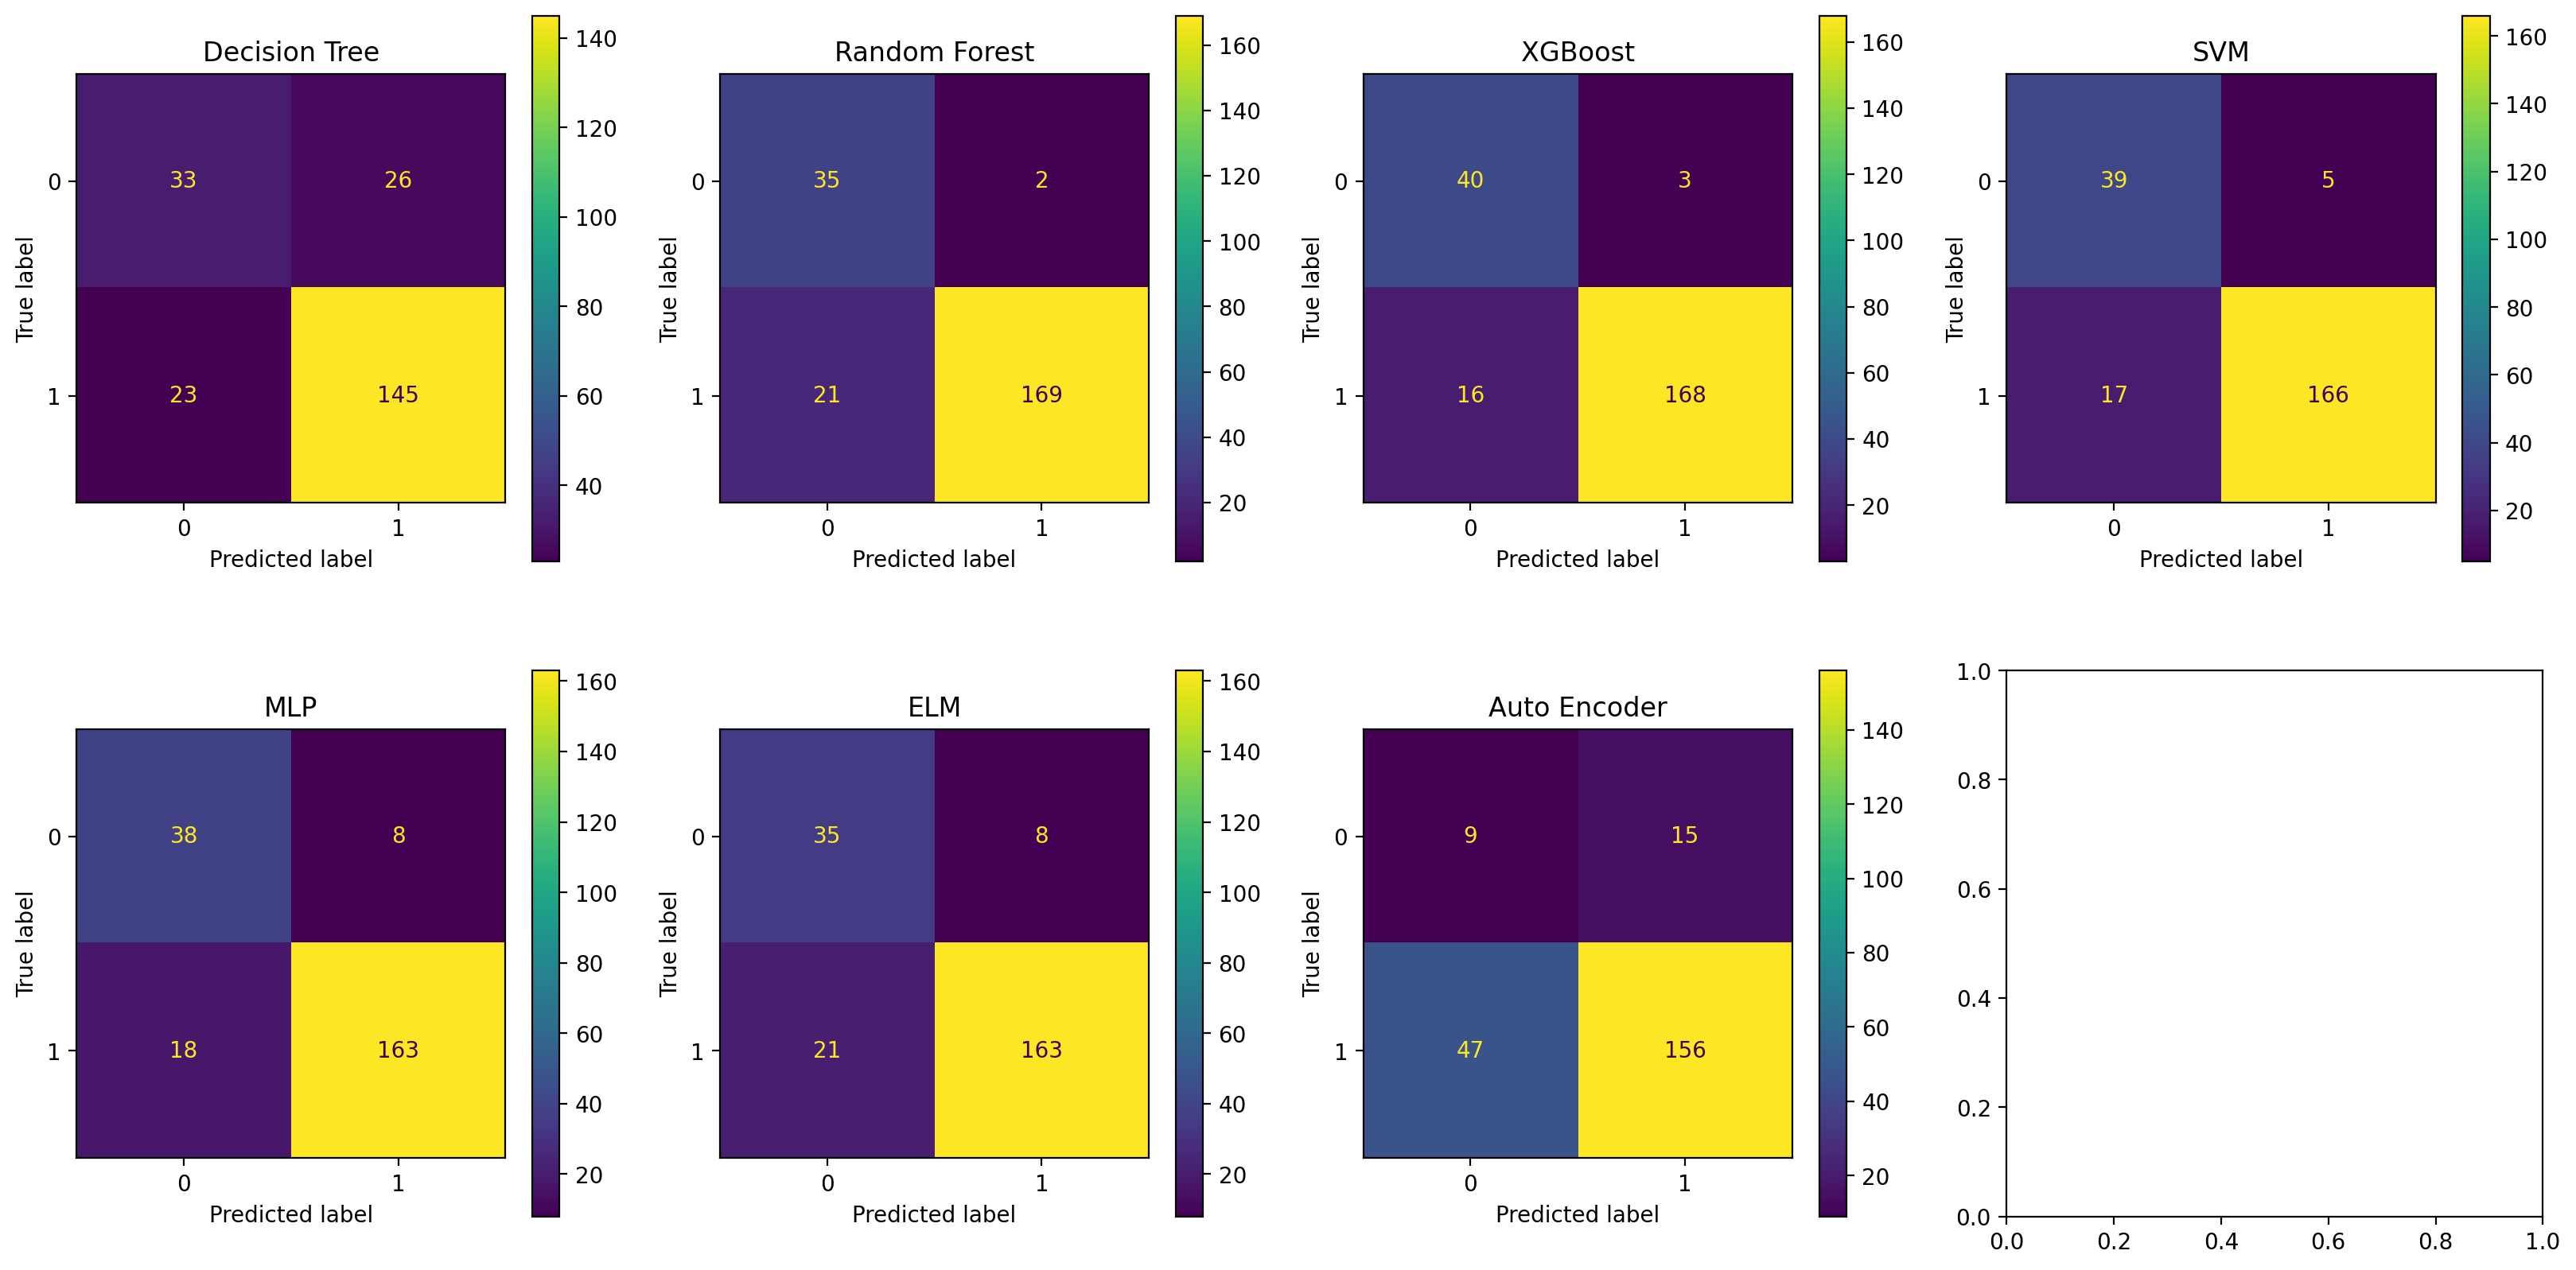

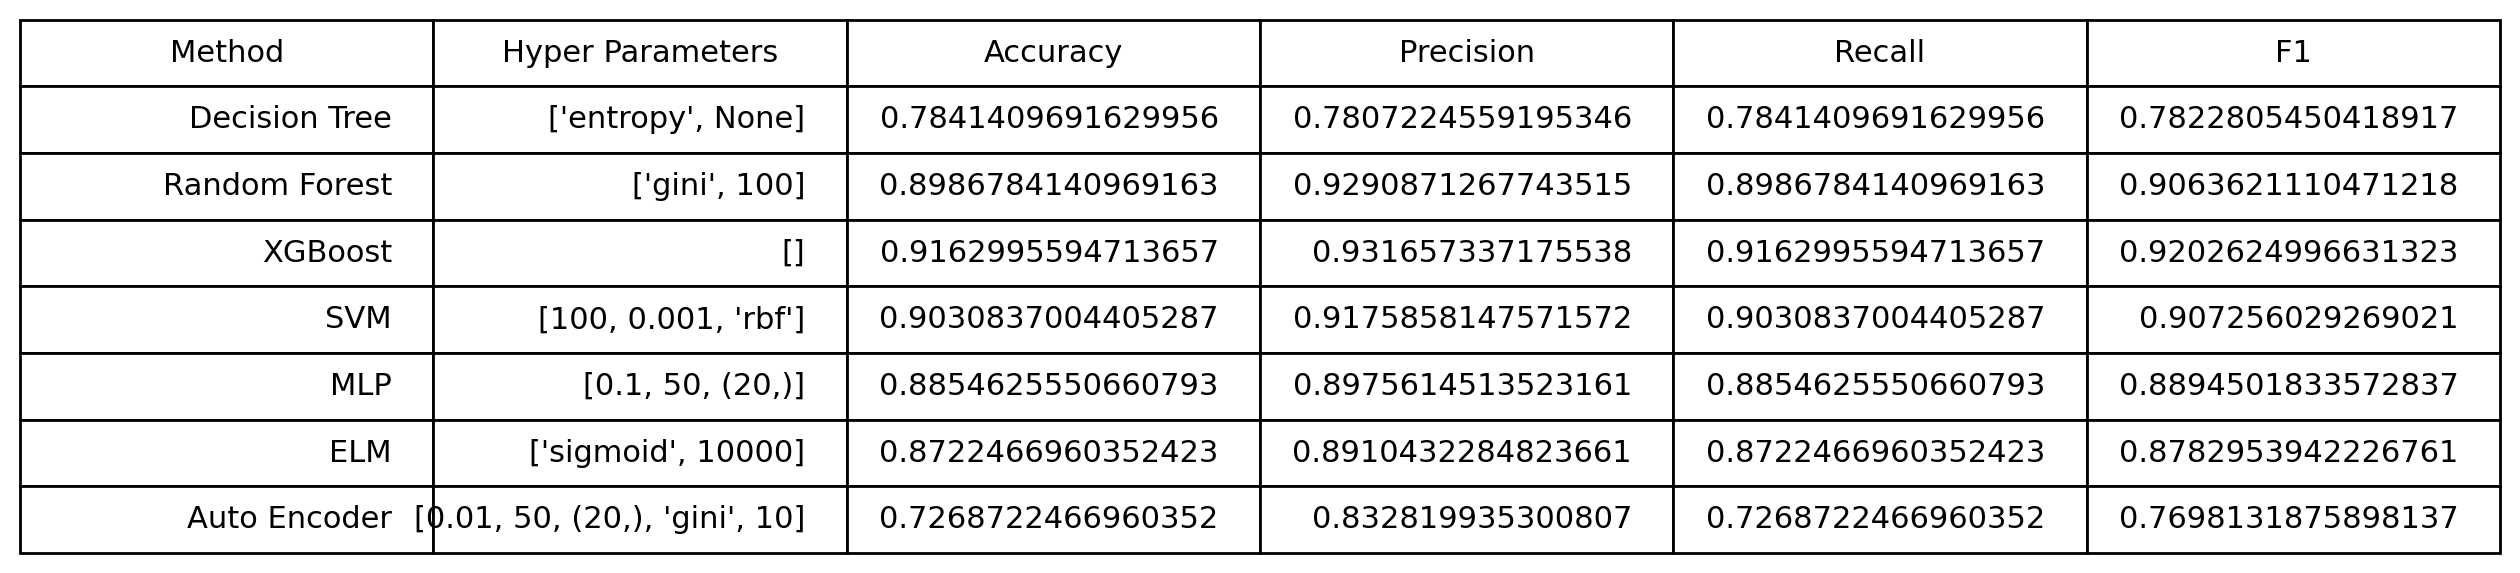

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10), dpi=200)
axes = axes.flatten()

axes[0].set_title("Decision Tree")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Random Forest")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[1]
)

axes[2].set_title("XGBoost")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    xgboost_predicts,
    test_labels,
    ax=axes[2]
)

axes[3].set_title("SVM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    svm_predicts,
    test_labels,
    ax=axes[3]
)

axes[4].set_title("MLP")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    mlp_predicts,
    test_labels,
    ax=axes[4]
)

axes[5].set_title("ELM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    elm_predicts,
    test_labels,
    ax=axes[5]
)

axes[6].set_title("Auto Encoder")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    auto_encoder_predicts,
    test_labels,
    ax=axes[6]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        list(decision_tree_model.best_params_.values()),
        skmetrics.accuracy_score(decision_tree_predicts, test_labels),
        skmetrics.precision_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Random Forest",
        list(random_forest_model.best_params_.values()),
        skmetrics.accuracy_score(random_forest_predicts, test_labels),
        skmetrics.precision_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(random_forest_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "XGBoost",
        list(xgboost_model.best_params_.values()),
        skmetrics.accuracy_score(xgboost_predicts, test_labels),
        skmetrics.precision_score(xgboost_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(xgboost_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(xgboost_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "SVM",
        list(svm_model.best_params_.values()),
        skmetrics.accuracy_score(svm_predicts, test_labels),
        skmetrics.precision_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(svm_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "MLP",
        list(mlp_model.best_params_.values()),
        skmetrics.accuracy_score(mlp_predicts, test_labels),
        skmetrics.precision_score(mlp_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(mlp_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(mlp_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "ELM",
        list(elm_model.best_params_.values()),
        skmetrics.accuracy_score(elm_predicts, test_labels),
        skmetrics.precision_score(elm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(elm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(elm_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Auto Encoder",
        list(auto_encoder_model.best_params_.values()),
        skmetrics.accuracy_score(auto_encoder_predicts, test_labels),
        skmetrics.precision_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True)
    ]
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

After a lot of tries, we can see:

- The `Decision Tree` model is a good fit with a low learning time
- The `Random Forest` model is very good fit with a some learning time
- The `XGBoost` model is very good fit with a high learning time
- The `SVM` model is not a good solution for this king of problem with a lot of features

---